# Estatística Descritiva

É a etapa inicial da análise de dados e se preocupa com a coleta, organização e descrição dos dados observados.

In [1]:
!pip install seaborn

In [2]:
# Importando as lib
# Obs: se tiver algum problema com a importação por nao ter o pacote instalado pode instalar usando a linha acima !pip install <pacote>
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# ler os dados
dados = pd.read_csv('../Database/marketing_data.csv')
print(f'Shape dos dados: {dados.shape}')
dados.head(3)

Shape dos dados: (120, 17)


,id_cliente,sucesso,idade,ocupacao,estado_civil,educacao_formal,produto_credito,produto_fin_imob,npl_90,tipo_contato,mes_contato,dia_semana_contato,num_contatos,dias_ult_contato,num_prev_conato,sucesso_prev,saldo
0,DNXO0711,nao,45,industria,casado,medio_completo,nao,sim,nd,email,jun,sex,3,999,0,nao_aplica,13000.42
1,DNXO0712,nao,46,ti,casado,ensino_superior,nao,sim,nao,whatsapp,ago,qua,1,999,0,nao_aplica,13000.43
2,DNXO0713,nao,47,industria,casado,ensino_superior,nao,sim,nao,whatsapp,ago,qua,1,999,0,nao_aplica,13000.44


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_cliente          120 non-null    object 
 1   sucesso             120 non-null    object 
 2   idade               120 non-null    int64  
 3   ocupacao            120 non-null    object 
 4   estado_civil        120 non-null    object 
 5   educacao_formal     120 non-null    object 
 6   produto_credito     120 non-null    object 
 7   produto_fin_imob    120 non-null    object 
 8   npl_90              120 non-null    object 
 9   tipo_contato        120 non-null    object 
 10  mes_contato         120 non-null    object 
 11  dia_semana_contato  120 non-null    object 
 12  num_contatos        120 non-null    int64  
 13  dias_ult_contato    120 non-null    int64  
 14  num_prev_conato     120 non-null    int64  
 15  sucesso_prev        120 non-null    object 
 16  saldo   

EDA = Análise e Exploração de dados

## 1 - Medidas de Tendência Central

Medidas de têndencia central são os valores que representam um conjunto de dados, de forma que ajudam a saber onde os dados estão acumulados, mas sem indicar com oestão distribuídos. Ees são assim chamados porque tendem a estar localizados na parte central do conjunto de dados.

### 1.1 - Média

Seja $X$ uma variável quantitativa e $x_1,x_2,x_3, ...$ os valores assumidos por X. Define-se média de $\overline{x}$ como sendo :

$$\overline{x} = \frac{\sum{i=1}^{n}x_i}{n} = \frac{x_1 + x_2 + x_3 + ... + x_n}{n}$$

Onde $x_i$ representa o conjunto numérico de dados e $n$ o número total de dados.

**Interpretação:**
É um valor único interpretado como o "ponto de equilíbrio" ou "centro de massa" do conjunto de dados, pois tem a propriedade de equilibrar os desvios dos dados em relação ao seu próprio valor. Porém, é uma medida sensível a valores extremos (outliers).

In [4]:
# Define uma semente randômica -> valor para gerar dados e apresentar sempre o mesmo valor
np.random.seed(42)

# Vamos criar uma amostra aleatória de números inteiros
amostra = np.random.randint(1, 20, 12)

# Print da amostra
print(f'Dados: {amostra}')

# Print da Média da Amostra
print(f'- Média dos dados: {amostra.mean()}')

Dados: [ 7 15 11  8  7 19 11 11  4  8  3  2]
- Média dos dados: 8.833333333333334


In [5]:
# Com os dados da idade do dataset
media_idade = dados['idade'].mean()
print(f'\n- Média da Idade : {media_idade}')

# Com os dados do saldo do dataset
media_saldo = dados['saldo'].mean()
print(f'\n- Média do Saldo : {media_saldo}')


- Média da Idade : 104.5

- Média do Saldo : 13002.230000000001


In [6]:
print(f'\n- Média da Idade : {media_idade:.2f}')
print(f'\n- Média do Saldo : {media_saldo:.2f}')


- Média da Idade : 104.50

- Média do Saldo : 13002.23


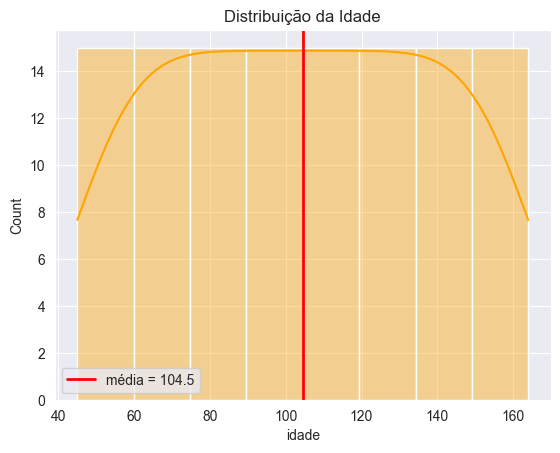

In [7]:
# Análise gráfica -> dados quantitativos contínuos
sns.histplot(dados['idade'], bins='auto', color='orange', alpha=0.4, kde=True)
plt.axvline(dados['idade'].mean(), color='red',label='média = ' + str(round(media_idade, 2)), lw=2)
plt.title('Distribuição da Idade')
plt.legend()    # Cria a legenda
plt.show()

### 1.1.1 - Propriedades

- A soma dos desvios em relação à média é igual a zero para qualquer amostra.
- $$ \sum_{i=1}^{n} (x_i - \overline{x}) = 0$$

In [8]:
# Print da amostra
exemplo = np.array([1, 2, 3, 4, 5])
print(f'Dados exemplo: {exemplo}')

# Print da média da amostra
print(f"- Média dos dados: {exemplo.mean()}")

desvio = (exemplo - exemplo.mean())

print(f"- Desvio em relação à média dos dados: {desvio}")
print(f"- Soma total dos desvios: {desvio.sum()}")

Dados exemplo: [1 2 3 4 5]
- Média dos dados: 3.0
- Desvio em relação à média dos dados: [-2. -1.  0.  1.  2.]
- Soma total dos desvios: 0.0


- A soma ou subtração de uma constante (k) aos dados altera a média de tal forma que a nova média fica adicionada ou subtraída pela constante.

$$\frac{\sum_{i=1}^{n}{(k\pm x_i)}}{n} = k\pm\frac{\sum_{i=1}^{n}{( x_i)}}{n}$$

**obs** O mesmo aplica para multiplicação ou divisão de uma constante (k) aos dados.

In [9]:
# Print da amostra
exemplo = np.array([1, 2, 3, 4, 5])
print(f'Dados exemplo: {exemplo}')

# Print da média da amostra
print(f"- Média dos dados: {exemplo.mean()}")

# Adicionando uma constante
constante = 5

x = (exemplo + constante)

print(f"- Dados + constante: {x}")
print(f"\n- Média dos (dados + constante): {x.mean()}")
print(f"- Média dos dados + constante: {exemplo.mean() + constante}")

Dados exemplo: [1 2 3 4 5]
- Média dos dados: 3.0
- Dados + constante: [ 6  7  8  9 10]

- Média dos (dados + constante): 8.0
- Média dos dados + constante: 8.0


### 1.1.2 - Média populacional *vs* Média amostral


<style>
  table {
      width: 50%;
      margin-left: auto;
      margin-right: auto;
      border-collapse: collapse;
  }
  
  th, td {
      padding: 10px;
      text-align: left;
      border-bottom: 1px solid #ddd;
  }
  
  th {
      background-color: #000000;
  }
</style>


|                    | Média populacional               |         Média amostral         |
|:------------------:|:--------------------------------:|:------------------------------:|
|    **Símbolo**     | $$\mu $$                         |       $$\overline{x} $$        |
|    **Fórmula**     | $$ \frac{\sum_{i=1}^{N}x_i}{N}$$ | $$\frac{\sum_{i=1}^{n}x_i{n}$$ |
| **Aplicabilidade** | População                        |            Amostra             |
|  **Representado**  | Letras gregas                    |        Letras do latim         |
| **Número total de dados** | N                         |             $$n$$              |


**Lei dos Grandes Números**

Determina que, a média da amostra converge para a medida populacional quando **$n$** tende a **N**:

$$\overline{x}\to \mu \quad\quad \text{quando} \quad\quad n \to N$$

### <p style="color:Orange"> Prática</p>
Qual é a média da variável "saldo" no dataset? (Coloque o histograma e onde esta posicionada a média)


- Média do Saldo : 13002.23


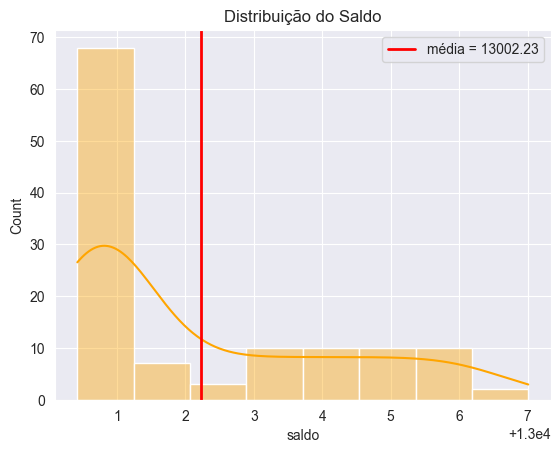

In [10]:
# Com os dados do saldo do dataset
media_saldo = dados['saldo'].mean()
print(f'\n- Média do Saldo : {media_saldo:.2f}')

# Análise gráfica -> dados quantitativos contínuos
sns.histplot(dados['saldo'], bins='auto', color='orange', alpha=0.4, kde=True)
plt.axvline(dados['saldo'].mean(), color='red',label='média = ' + str(round(media_saldo, 2)), lw=2)
plt.title('Distribuição do Saldo')
plt.legend()    # Cria a legenda
plt.show()

### 1.2 - Mediana

A **mediana** é uma medida que divide um conjunto de dados em duas partes iguais. Assim, para calcularmos a mediana, *basta ordenarmos os dados, do menor para o maior*, e contar o que está no meio dos dados ordenados (se houver número par de dados, pega-se a média entre os dados que estão "no meio")

- - Mediana de $X = X_{\frac{n+1}{2}}$ ` Se tamanho da amostra for ímpar`


- - Mediana de $X = \frac{X_{\frac{n}{2}} + X_{\frac{n+1}{2}}}{2}$ ` Se tamanho da amostra for par`


Como os valores de **indice no python** começam em `0`, devemos nos atentar que a equação acima deve ficar como:

- - Mediana de $X = X_{\frac{n}{2}}$ ` Se tamanho da amostra for par`


- - Mediana de $X = \frac{X_{\frac{n-1}{2}} + X_{\frac{n}{2}}}{2}$ ` Se tamanho da amostra for ímpar`


**Interpretação:**
É uma medida robusta a valores extremos (outliers), pois está relacionada apenas com a ordem dos valores da variável.

Exemplo
(Dados devem estar ordenados)

i) 3, 4, <font color='red'>**7**</font>, 8, 8
mediana = 7 (CASO ÍMPAR)

ii) 3, 4, <font color='red'>**7**</font>, <font color='red'>**8**</font>, 8, 9
mediana = 7, 5 (CASO PAR)

In [11]:
 Print do valor da Mediana (caso ímpar)
impar = [3, 4, 7, 8, 8]
print("\n - Mediana de: ", impar, " = ", np.median(impar))

# Print do valor da Mediana (caso par)
par = [3, 4, 7, 8, 8, 9]
print(" - Mediana de: ", par, " = ", np.median(par))


 - Mediana de:  [3, 4, 7, 8, 8]  =  7.0
 - Mediana de:  [3, 4, 7, 8, 8, 9]  =  7.5


In [12]:
# Define a semente randômica
np.random.seed(42)

# Cria uma amostra de números aleatórios
amostra = np.random.randint(1, 20, 13)

# Print da amostra
print(f'Dados: {amostra}')

# Print da Amostra ordenada
print(f'\nDados ordenados: {np.sort(amostra)}')

# Print do valor da Mediana
print(f'Mediana dos dados: {np.median(amostra)}')

Dados: [ 7 15 11  8  7 19 11 11  4  8  3  2 12]

- Dados ordenados: [ 2  3  4  7  7  8  8 11 11 11 12 15 19]
Mediana dos dados: 8.0


In [13]:
# No nosso dataset
# Com os dados do dataset
mediana_idade = dados['idade'].median()
print(f'\nMediana da Idade : {mediana_idade}')

# Com os dados do dataset
mediana_saldo = dados['saldo'].median()
print(f'Mediana do Saldo : {mediana_saldo}')


Mediana da Idade : 104.5
Mediana do Saldo : 13001.015


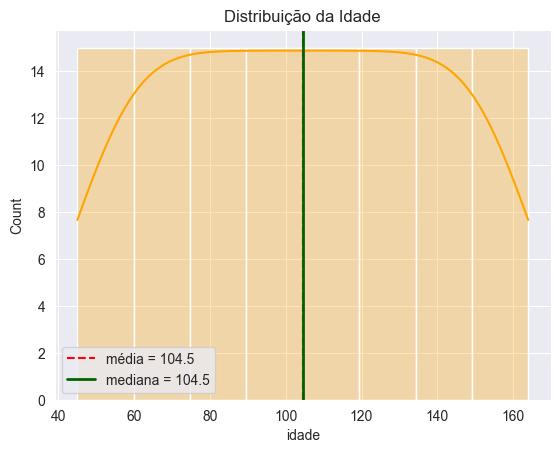

In [14]:
# Na representação gráfica

# Análise gráfica -> dados quantitativos contínuos
sns.histplot(dados['idade'], color='orange', alpha=0.3, kde=True)

# Plotando a mediana
plt.axvline(dados['idade'].mean(), color='red', label='média = ' + str(round(mediana_idade, 2)), ls='--')
plt.axvline(dados['idade'].median(), color='darkgreen', label='mediana = ' + str(round(mediana_idade, 2)), lw=2)
plt.title('Distribuição da Idade')

# Crie uma legenda
plt.legend()
plt.show()

### <p style="color:Orange"> Prática</p>
Qual é a mediana da variável "dias_ult_contato" no dataset?

Mediana dos dias_ult_contato : 999.0


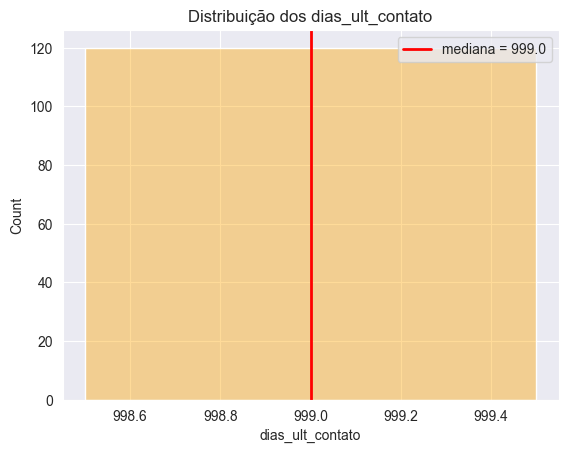

In [15]:
# Com os dados do dataset
mediana_dias = dados['dias_ult_contato'].median()
print(f'Mediana dos dias_ult_contato : {mediana_dias}')

# Análise gráfica -> dados quantitativos contínuos
sns.histplot(dados['dias_ult_contato'], bins='auto', color='orange', alpha=0.4, kde=True)
plt.axvline(dados['dias_ult_contato'].median(), color='red',label='mediana = ' + str(round(mediana_dias, 2)), lw=2)
plt.title('Distribuição dos dias_ult_contato')
plt.legend()    # Cria a legenda
plt.show()

### 1.3 - Moda

A **moda** é o valor (resultado númerico) que aparece com **mais frequência** no conjunto de dados.

Dependendo do conjunto de dados, ele pode ser:
- *Amodal:* quando todos os valores das variáveis apresentam uma mesma frequência.
- *Unimodal:* quando existe apenas um valor repetido com maior frequência.
- *Bimodal | Trimodal | Plurimodal:* e se apresentam 2, 3, ou vários valores com a mesma frequência, repectivamente

**Interpretação:** É útil para identificar o valor mais comum do conjunto de dados.

In [16]:
# - Print da amostra
print(f'Dados: {amostra}')
print(f'Dados ordenados: sorted({amostra})')
print(f'Moda dos dados e sua frequência: {stats.mode(amostra)}')

Dados: [ 7 15 11  8  7 19 11 11  4  8  3  2 12]
Dados ordenados: sorted([ 7 15 11  8  7 19 11 11  4  8  3  2 12])
Moda dos dados e sua frequência: ModeResult(mode=11, count=3)


In [17]:
# - No dataset
dados['idade'].mode()

0       45
1       46
2       47
3       48
4       49
      ... 
115    160
116    161
117    162
118    163
119    164
Name: idade, Length: 120, dtype: int64

In [18]:
# - No dataset
dados['idade'].value_counts()

idade
45     1
46     1
133    1
132    1
131    1
      ..
80     1
79     1
78     1
77     1
164    1
Name: count, Length: 120, dtype: int64

In [19]:
# - No dataset
dados['idade'].mode()[0]

45

In [21]:
# - Um exemplo com 2 valores de moda (bimodal)
amostra3 = [1, 2, 3, 3, 4, 5, 6, 6, 7, 8]
pd.Series(amostra3).mode()

0    3
1    6
dtype: int64

In [23]:
# - Um exemplo com 2 valores de moda (bimodal)
print(f'Bimodal - moda1: {pd.Series(amostra3).mode()[0]}')
print(f'Bimodal - moda2: {pd.Series(amostra3).mode()[1]}')

Bimodal - moda1: 3
Bimodal - moda2: 6


**Observação:** Entre as medidas de centralidade, a moda é uma das poucas que podem ser applicadas em conjuntos de dados quantitativos e qualitativos.

Moda dos dados: solteiro


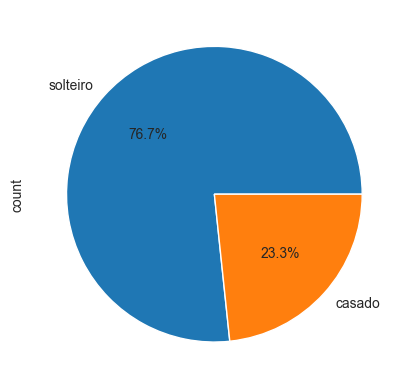

In [24]:
# na representação gráfica

# Análise gráfica -> usando variáveis quantitativas
dados['estado_civil'].value_counts().plot.pie(autopct='%1.1f%%')
print(f'Moda dos dados: {dados["estado_civil"].mode()[0]}')

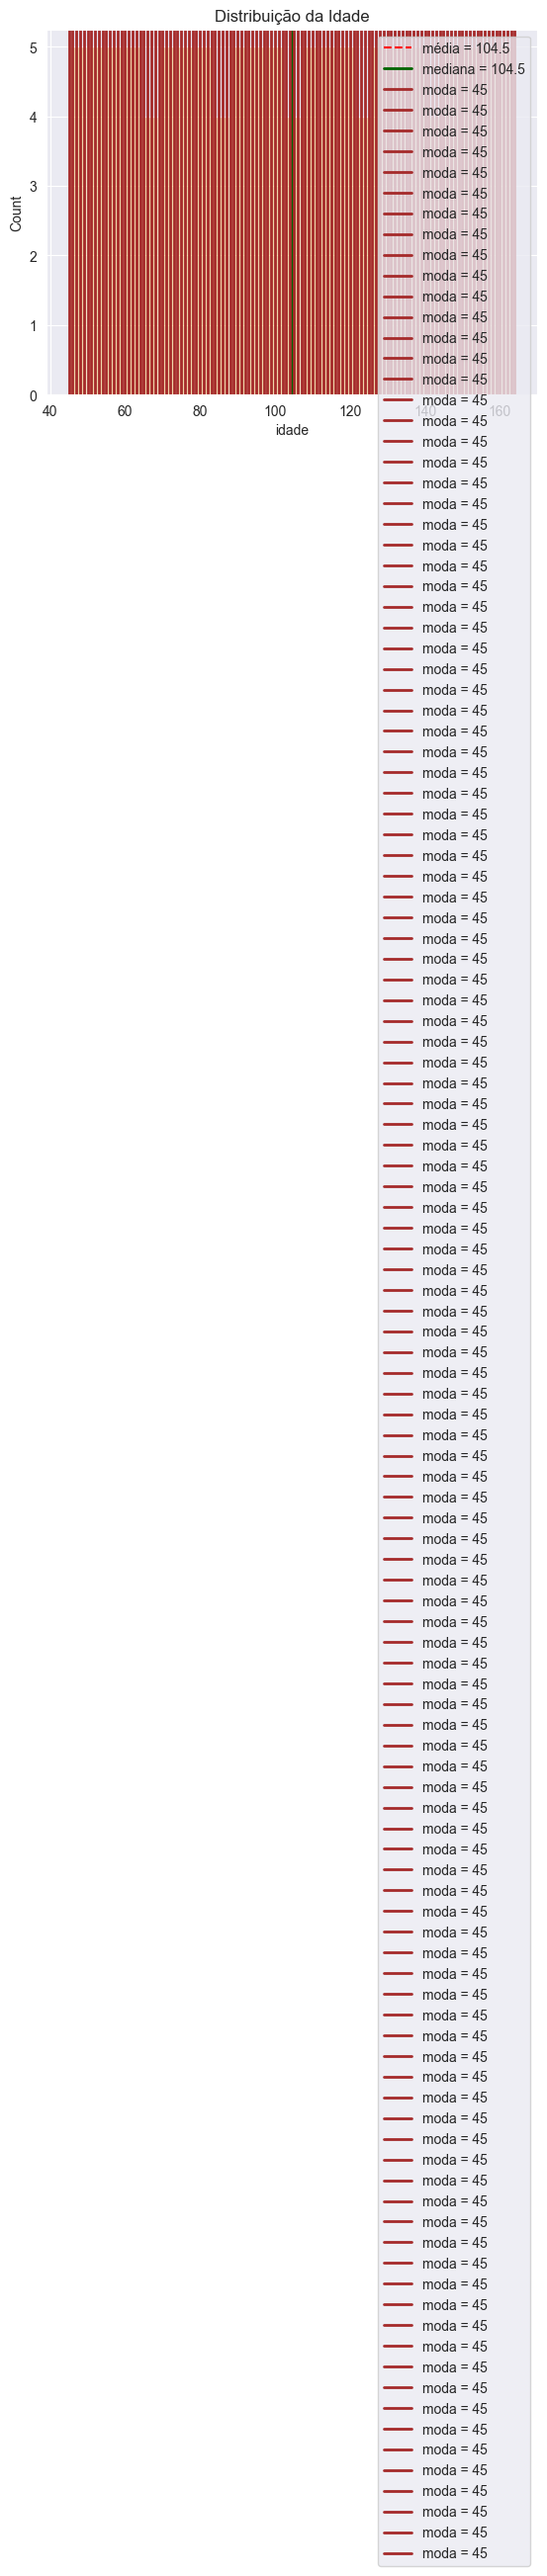

In [27]:
# Na representação gráfica

# Análise gráfica -> dados quantitativos contínuos
sns.histplot(dados['idade'], bins=25, color='orange', alpha=0.3)

# plotando a primeira moda
plt.title('Distribuição da Idade')

plt.axvline(dados['idade'].mean(), color='red', label='média = ' + str(round(media_idade, 2)), ls='--')
plt.axvline(dados['idade'].median(), color='darkgreen', label='mediana = ' + str(round(mediana_idade, 2)), lw=2)

# Loop para plotar as modas
for i in range(dados['idade'].mode().shape[0]):
    plt.axvline(dados['idade'].mode()[i], color='brown', label='moda = ' + str(round(dados['idade'].mode()[0], 2)), lw=2)

# Crie uma legenda
plt.legend()
plt.show()

### 1.4 - Quartil

Valores de um conjunto de dados que dividem a distribuição em **quatro** partes iguais com os _dados ordenados_.


- 1° quartil: o valor que deixa 25% dos dados abaixo dele e 75% acima dele.

- 2° quartil: o valor que deixa 50% dos dados abaixo dele e 50% acima dele, ou seja, é a mediana.

- 3° quartil: o valor que deixa 75% dos dados abaixo dele e 25% acima dele.

<img src='http://aprendendogestao.com.br/wp-content/uploads/2016/07/QE-Figura-1.png' >


Generalizando: percentil Pn é o valor que deixa n% dos dados abaixo dele e (100 - n% acima dele)

**Interpretação:** São valores que ocupam lugares específicos em uma série ordenada.

In [28]:
# Print da amostra
print(f'Dados: {amostra}')

# Print da amostra ordenada
print(f'Dados ordenados: {sorted(amostra)}')

# print dos quartis
print(f'\nQ1: {np.quantile(amostra, 0.25)}')
print(f'Q2: {np.quantile(amostra, 0.50)}')
print(f'Q3: {np.quantile(amostra, 0.75)}')

Dados: [ 7 15 11  8  7 19 11 11  4  8  3  2 12]
Dados ordenados: [2, 3, 4, 7, 7, 8, 8, 11, 11, 11, 12, 15, 19]

Q1: 7.0
Q2: 8.0
Q3: 11.0


In [29]:
# Print dos quartis usando o nosso dataset
print(f'\nQ1: {np.quantile(dados["idade"], 0.25)}')
print(f'Q2: {np.quantile(dados["idade"], 0.50)}')
print(f'Q3: {np.quantile(dados["idade"], 0.75)}')


Q1: 74.75
Q2: 104.5
Q3: 134.25


In [30]:
# No nosso dataset
dados['idade'].quantile([0.25, 0.5, 0.75])

0.25     74.75
0.50    104.50
0.75    134.25
Name: idade, dtype: float64

### 1.4.1 - Percentil

O valor tal que _P_ por cento dos dados estão abaixo

In [31]:
print(f'0.1-quantile: {np.quantile(amostra, 0.1)}')

0.1-quantile: 3.2


In [32]:
# Usando o dataset
print(f'0.1-quantile: {np.quantile(dados["idade"], 0.1)}')

0.1-quantile: 56.9


In [33]:
# No nosso dataset
dados['idade'].quantile([0.05, 0.1, 0.95, 1])

0.05     50.95
0.10     56.90
0.95    158.05
1.00    164.00
Name: idade, dtype: float64

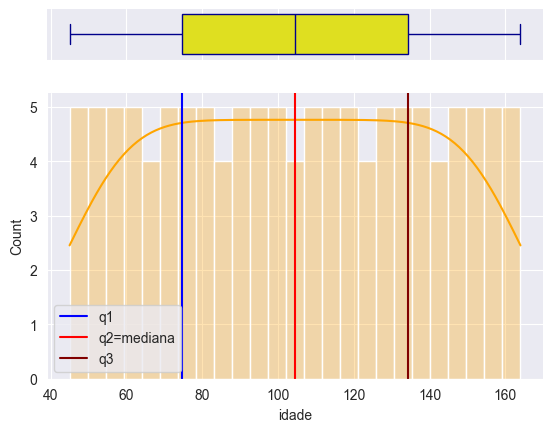

In [34]:
x = dados['idade']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(x=x, linecolor="darkblue", color="yellow", ax=ax_box)
sns.histplot(dados['idade'], bins=25, color='orange', alpha=0.3, kde=True, ax=ax_hist)

# Plotando a mediana
plt.axvline(dados['idade'].quantile(0.25), color='blue', label='q1')
plt.axvline(dados['idade'].quantile(0.50), color='red', label='q2=mediana')
plt.axvline(dados['idade'].quantile(0.75), color='maroon', label='q3')

# Crie uma legenda
plt.legend()
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

#### 2.3 Resumo

ValueError: Unrecognized linestyle: 2

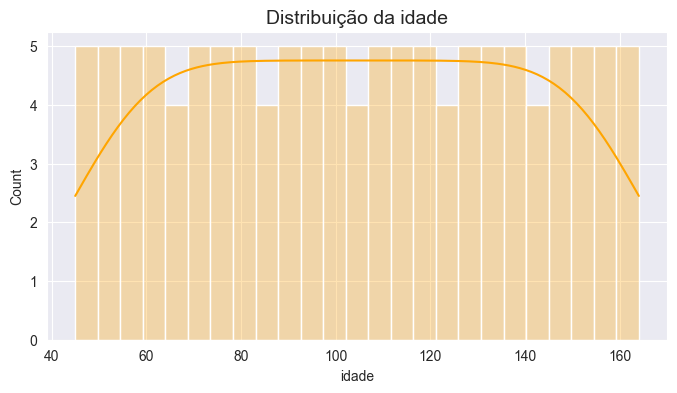

In [35]:
# Define o tamanho da figura
plt.figure(figsize=(8, 4))

# Define o título
plt.title('Distribuição da idade', size=14)

# Plot do histograma
sns.histplot(dados['idade'], bins=25, color='orange', alpha=0.3, kde=True)

# Plotando a média
plt.axvline(dados['idade'].mean(), color='red', label='média=q2= = ' + str(round(media_idade, 2)), ls=2)

# Plotando a mediana
plt.axvline(dados['idade'].median(), color='darkgreen', label='mediana = ' + str(round(mediana_idade, 2)), lw=2)

# Loop para plotar as modas
for i in range(dados['idade'].mode().shape[0]):
    plt.axvline(dados['idade'].mode()[i], color='brown', label='moda = ' + str(round(dados['idade'].mode()[0], 2)), lw=2)

plt.axvline(dados['idade'].quantile(0.25), color='blue', label='q1' + str(round(dados['idade'].quantile(0.25))), ls='--')
plt.axvline(dados['idade'].quantile(0.75), color='maroon', label='q3' + str(round(dados['idade'].quantile(0.75))), ls='--')

# Crie uma legenda
plt.legend()

# Mostra o gráfico
plt.show()